<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IEEE-CIS-Fraud-Detection" data-toc-modified-id="IEEE-CIS-Fraud-Detection-1">IEEE-CIS Fraud Detection</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1">Imports</a></span></li><li><span><a href="#Reading-in-and-merging-dataframes" data-toc-modified-id="Reading-in-and-merging-dataframes-1.2">Reading in and merging dataframes</a></span></li><li><span><a href="#Data-exploration" data-toc-modified-id="Data-exploration-1.3">Data exploration</a></span><ul class="toc-item"><li><span><a href="#Column-stats-grouped-by-fraud-status" data-toc-modified-id="Column-stats-grouped-by-fraud-status-1.3.1">Column stats grouped by fraud status</a></span></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-1.3.2">Missing values</a></span></li><li><span><a href="#List-of-categorical-columns" data-toc-modified-id="List-of-categorical-columns-1.3.3">List of categorical columns</a></span></li><li><span><a href="#ProductCD-(categorical)" data-toc-modified-id="ProductCD-(categorical)-1.3.4">ProductCD (categorical)</a></span></li><li><span><a href="#card1---card6-(categorical)" data-toc-modified-id="card1---card6-(categorical)-1.3.5">card1 - card6 (categorical)</a></span></li><li><span><a href="#TransactionDT,-TransactionID,-TransactionAmt-(continuous)" data-toc-modified-id="TransactionDT,-TransactionID,-TransactionAmt-(continuous)-1.3.6">TransactionDT, TransactionID, TransactionAmt (continuous)</a></span></li><li><span><a href="#addr1,-addr2-(categorical)" data-toc-modified-id="addr1,-addr2-(categorical)-1.3.7">addr1, addr2 (categorical)</a></span></li><li><span><a href="#dist1,-dist2-(continuous)" data-toc-modified-id="dist1,-dist2-(continuous)-1.3.8">dist1, dist2 (continuous)</a></span></li><li><span><a href="#P_emaildomain,--R_emaildomain-(categorical)" data-toc-modified-id="P_emaildomain,--R_emaildomain-(categorical)-1.3.9">P_emaildomain,  R_emaildomain (categorical)</a></span></li><li><span><a href="#C1---C14-(continuous)" data-toc-modified-id="C1---C14-(continuous)-1.3.10">C1 - C14 (continuous)</a></span></li><li><span><a href="#D1---D15--(continuous)" data-toc-modified-id="D1---D15--(continuous)-1.3.11">D1 - D15  (continuous)</a></span></li><li><span><a href="#M1---M9-(categorical)" data-toc-modified-id="M1---M9-(categorical)-1.3.12">M1 - M9 (categorical)</a></span></li><li><span><a href="#V1---V339-(continuous)" data-toc-modified-id="V1---V339-(continuous)-1.3.13">V1 - V339 (continuous)</a></span></li><li><span><a href="#id_1---id_11-(continuous)" data-toc-modified-id="id_1---id_11-(continuous)-1.3.14">id_1 - id_11 (continuous)</a></span></li><li><span><a href="#id_12---id_38-(categorical)" data-toc-modified-id="id_12---id_38-(categorical)-1.3.15">id_12 - id_38 (categorical)</a></span></li><li><span><a href="#Devicetype,-DeviceInfo-(categorical)" data-toc-modified-id="Devicetype,-DeviceInfo-(categorical)-1.3.16">Devicetype, DeviceInfo (categorical)</a></span></li></ul></li><li><span><a href="#Creating-simplified-data-sets-for--experimentation" data-toc-modified-id="Creating-simplified-data-sets-for--experimentation-1.4">Creating simplified data sets for  experimentation</a></span><ul class="toc-item"><li><span><a href="#Random-sampling-of-the-test-set" data-toc-modified-id="Random-sampling-of-the-test-set-1.4.1">Random sampling of the test set</a></span></li><li><span><a href="#Simplfication-of-data-set" data-toc-modified-id="Simplfication-of-data-set-1.4.2">Simplfication of data set</a></span></li></ul></li></ul></li></ul></div>

# IEEE-CIS Fraud Detection

## Imports

In [446]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [447]:
import sys
from zipfile import ZipFile
from pathlib import Path
import pandas as pd
import multiprocessing as mp
import torch
import datetime
from functools import partial
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.display.max_columns = None
pd.options.display.max_rows = 500

In [448]:
path = Path('/Users/baranserajelahi/Codes/fraud-detection-pytorch-scikit-fastai/data')

In [449]:
Path.BASE_PATH = path

In [450]:
# with ZipFile('ieee-fraud-detection.zip', 'r') as zip_ref:
#     zip_ref.extractall(path/'Data')

## Reading in and merging dataframes

In [6]:
files = [path/'test_identity.csv', 
         path/'test_transaction.csv',
         path/'train_identity.csv',
         path/'train_transaction.csv']

In [ ]:
%%time
def read_data(file):
    return pd.read_csv(file, low_memory=False)

with mp.Pool() as pool:
    test_id, test_tr, train_id, train_tr = pool.map(read_data, files)   

In [ ]:
train = pd.merge(train_tr, train_id, on='TransactionID', how='left')
test = pd.merge(test_tr, test_id, on='TransactionID', how='left')

In [ ]:
train.to_csv(path/'train.csv')
test.to_csv(path/'test.csv')

In [451]:
train = pd.read_csv(path/'train.csv', index_col=[0], low_memory=False)
test = pd.read_csv(path/'test.csv', index_col=[0], low_memory=False)

## Data exploration 

In [452]:
print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')

Train dataset has 590540 rows and 434 columns.
Test dataset has 506691 rows and 433 columns.


In [453]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

<AxesSubplot:xlabel='isFraud', ylabel='Value counts'>

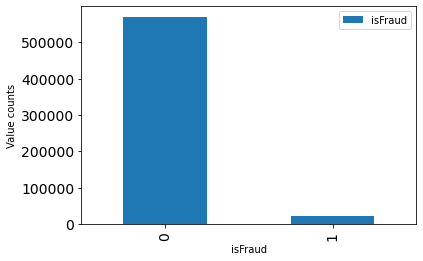

In [454]:
train['isFraud'].value_counts().plot.bar(xlabel='isFraud', ylabel='Value counts', 
                                         fontsize=14, legend=True)

In [455]:
train['isFraud'].mean()

0.03499000914417313

This indicates that there is class imbalance of about 1 to 30. 

### Column stats grouped by fraud status

In [456]:
print('Sum of values')
train.groupby(by='isFraud').sum()

Sum of values


,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
isFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1870227844612,4194745567379,7.665510e+07,5648315587,203469704.0,86879290.0,112906571.0,148783814.0,44440934.0,27405226.0,7972331.0,7587885.0,8077028.0,3328.0,2105056.0,3261142.0,5007154.0,1434656.0,2599141.0,2610552.0,2691829.0,5555061.0,2022894.0,18700214.0,4684669.0,54798175.0,51908941.0,9174064.0,57977226.0,11734740.0,4754951.0,1555081.0,1.055761e+07,37967.727256,62912536.0,45103229.0,3161296.0,1064633.0,3196857.0,80823739.0,305130.0,318735.0,328289.0,258054.0,266853.0,318979.0,327074.0,313472.0,317449.0,143243.0,147877.0,281008.0,300422.0,497438.0,55483.0,55984.0,60627.0,61168.0,405099.0,420270.0,59400.0,60625.0,511625.0,523149.0,486508.0,491434.0,399.0,427.0,198057.0,207501.0,64751.0,65489.0,59329.0,63365.0,223902.0,238636.0,441578.0,459940.0,60526.0,63825.0,406698.0,57956.0,62144.0,428334.0,440325.0,414457.0,419750.0,160484.0,166510.0,61870.0,62485.0,66263.0,289401.0,310085.0,529184.0,553816.0,58524.0,60083.0,61717.0,65224.0,410710.0,428291.0,60134.0,65054.0,497118.0,487131.0,494676.0,274.0,198855.0,207871.0,64817.0,66554.0,63891.0,69108.0,266361.0,287186.0,519606.0,544572.0,59804.0,63227.0,66702.0,407701.0,424841.0,61058.0,66332.0,507033.0,521750.0,484622.0,452.0,199968.0,209201.0,66859.0,68591.0,60671.0,600632.0,1735628.0,992559.0,34461.0,513657.0,154623.0,517016.0,1059640.0,742920.0,48416.0,161316.0,94158.0,569335.0,571356.0,577174.0,573127.0,570106.0,571665.0,570567.0,573728.0,586884.0,577348.0,569614.0,570239.0,569805.0,569989.0,571926.0,570483.0,583886.0,619424.0,594894.0,7.493605e+07,1.929355e+08,1.168780e+08,4.837466e+06,5.239043e+07,1.729644e+07,6.000666e+07,1.180039e+08,8.419897e+07,9.834133e+06,2.211385e+07,1.502136e+07,2544.0,8

In [457]:
print('Mean of values')
train.groupby(by='isFraud').mean()

Mean of values


,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
isFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.281810e+06,7.360791e+06,134.511665,9911.464381,362.453981,152.862034,199.542212,290.643341,86.813620,117.360098,235.199758,13.314952,14.173283,0.005840,3.693878,5.722537,8.786377,2.517484,4.560881,4.580904,4.723526,9.747825,3.549703,32.814474,8.220491,96.364705,171.956223,28.845357,142.432339,43.491155,72.629046,46.943007,157.343727,0.565846,126.396130,147.808201,55.345787,19.316574,58.152163,166.633142,0.999944,1.044529,1.075839,0.845671,0.874506,1.045329,1.071857,1.027282,1.040315,0.469423,0.484609,0.564623,0.603632,0.999492,0.111481,0.112487,0.121817,0.122904,0.813957,0.844440,0.119351,0.121813,1.027997,1.051152,0.977530,0.987428,0.000802,0.000858,0.397952,0.416927,0.130103,0.131586,0.119209,0.127318,0.550122,0.586323,1.084948,1.130063,0.148711,0.156817,0.999248,0.142397,0.152686,1.052407,1.081869,1.018312,1.031317,0.394306,0.409111,0.152013,0.153524,0.162807,0.581956,0.623550,1.064136,1.113668,0.117686,0.120821,0.124107,0.131159,0.825896,0.861250,0.120923,0.130817,0.999654,0.979571,0.994744,0.000551,0.399877,0.418008,0.130340,0.133833,0.128478,0.138969,0.549210,0.592150,1.071377,1.122854,0.123310,0.130368,0.137533,0.840640,0.875981,0.125896,0.136770,1.045453,1.075798,0.999243,0.000932,0.412315,0.431352,0.137857,0.141428,0.125098,1.054517,3.047207,1.742616,0.060502,0.901817,0.271468,0.907714,1.860388,1.304330,0.085003,0.283219,0.165311,0.999570,1.003118,1.013333,1.006227,1.000923,1.003661,1.001733,1.007283,1.030380,1.013638,1.000060,1.001157,1.000395,1.000718,1.004119,1.001585,1.025117,1.087510,1.044443,131.563693,338.732854,205.200301,8.493041,91.980813,30.366999,105.352467,207.176966,147.826416,17.265588,38.824830,26.372703,0.032492,1.031

In [316]:
print('Standard deviations')
train.groupby(by='isFraud').std()

Standard deviations


,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
isFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,170754.780926,4.623930e+06,239.395078,4905.67237,157.726065,10.904432,41.046975,101.692564,2.607742,370.641879,536.798492,127.787969,147.485925,0.153208,65.839255,26.121841,68.689176,58.860773,91.023016,16.889451,91.239098,90.306569,82.601169,127.832166,47.898725,158.973258,177.773639,62.830058,192.213375,89.985719,147.600963,105.435756,237.987816,0.314576,183.710646,186.555365,127.166079,70.703174,137.532930,203.595694,0.007464,0.237326,0.314484,0.438623,0.471002,0.237727,0.302124,0.183936,0.222790,0.521856,0.552870,0.508471,0.528395,0.022541,0.318881,0.329104,0.338147,0.344751,0.425176,0.456660,0.327163,0.347641,0.192518,0.261379,0.183299,0.206031,0.029073,0.031653,0.513065,0.557192,0.344070,0.356108,0.32715,0.343634,0.515322,0.536893,0.480715,0.605612,0.413146,0.453107,0.027409,0.365600,0.407024,0.264426,0.346760,0.145434,0.190426,0.510969,0.545579,0.362182,0.376541,0.396980,0.509111,0.529922,0.382941,0.634752,0.333895,0.354333,0.365292,0.401378,0.433733,0.474493,0.342257,0.390062,0.018595,0.209554,0.233315,0.024142,0.515878,0.557105,0.350576,0.372346,0.350753,0.371890,0.512495,0.534486,0.437279,0.65411,0.358534,0.37784,0.415043,0.419453,0.463645,0.348039,0.399721,0.261994,0.339411,0.027498,0.032478,0.518220,0.564455,0.358622,0.382908,0.330855,21.410652,40.952917,28.194494,0.281261,2.74603,0.947877,20.951164,36.569617,26.144970,0.653947,3.426548,1.852491,0.020735,0.064075,0.117687,0.083539,0.044016,0.063399,0.049953,0.092617,0.180506,0.122735,0.030504,0.037059,0.03177,0.039766,0.065830,0.046801,0.177467,0.347368,0.240997,2388.479348,4311.400223,3062.462466,114.773011,315.485415,160.045517,2306.414902,3862.820432,2821.743297,298.301160,457.979

In [319]:
print('Number of values (excepting NaNs)')
train.groupby(by='isFraud').count()

Number of values (excepting NaNs)


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
isFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,569877,569877,569877,569877,569877,561367,568351,568341,565828,568345,511912,511912,233514,33896,478211,126064,569877,569877,569877,569877,569877,569877,569877,569877,569877,569877,569877,569877,569877,569877,568654,301873,318043,407051,269819,65469,33127,67099,67099,497741,305147,57119,55115,54974,485040,313098,313098,313098,293660,232489,412488,239458,239471,239471,305147,305147,305147,305147,305147,305147,305147,305147,305147,305147,305147,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,497691,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,407004,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,497290,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,484989,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,569580,78295,78295,78295,78295,78295,78300,78300,78300,78295,78295,78295,78295,78300,78300,78300,78295,78295,78295,78295,78295,7829

###  Missing values

In [320]:
train_nulls = train.isnull().drop('isFraud', axis=1)
train_nulls['isFraud'] = train['isFraud']

In [91]:
train_nulls.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,True,False,False,True,True,True,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,Fals

In [299]:
def nans_by_col(df):
    nans = pd.DataFrame(pd.Series(df.columns), columns=['column'])
    nans['NaN count'] = None
    nans['length'] = None
    nans['percent NaN'] = None
    for i, col in enumerate(df.columns):
        nans['NaN count'].iloc[i] = len(df[col]) - df[col].count()
        nans['length'].iloc[i] = len(df[col])
        nans['percent NaN'].iloc[i] = nans['NaN count'].iloc[i]/nans['length'].iloc[i]
    return nans

In [322]:
nans_by_col(train)

,column,NaN count,length,percent NaN
0,TransactionID,0,590540,0
1,isFraud,0,590540,0
2,TransactionDT,0,590540,0
3,TransactionAmt,0,590540,0
4,ProductCD,0,590540,0
5,card1,0,590540,0
6,card2,8933,590540,0.0151268
7,card3,1565,590540,0.00265012
8,card4,1577,590540,0.00267044
9,card5,4259,590540,0.00721204


In [323]:
nans_by_col(test)

,column,NaN count,length,percent NaN
0,TransactionID,0,506691,0
1,TransactionDT,0,506691,0
2,TransactionAmt,0,506691,0
3,ProductCD,0,506691,0
4,card1,0,506691,0
5,card2,8654,506691,0.0170794
6,card3,3002,506691,0.00592472
7,card4,3086,506691,0.0060905
8,card5,4547,506691,0.00897391
9,card6,3007,506691,0.00593458


In [326]:
print('Sum of values')
train_nulls.groupby(by='isFraud').sum()

Sum of values


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
isFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,8510,1526,1536,4049,1532,57965,57965,336363,535981,91666,443813,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1223,268004,251834,162826,300058,504408,536750,502778,502778,72136,264730,512758,514762,514903,84837,256779,256779,256779,276217,337388,157389,330419,330406,330406,264730,264730,264730,264730,264730,264730,264730,264730,264730,264730,264730,72186,72186,72186,72186,72186,72186,72186,72186,72186,72186,72186,72186,72186,72186,72186,72186,72186,72186,72186,72186,72186,72186,72186,162873,162873,162873,162873,162873,162873,162873,162873,162873,162873,162873,162873,162873,162873,162873,162873,162873,162873,72587,72587,72587,72587,72587,72587,72587,72587,72587,72587,72587,72587,72587,72587,72587,72587,72587,72587,72587,72587,72587,72587,84888,84888,84888,84888,84888,84888,84888,84888,84888,84888,84888,84888,84888,84888,84888,84888,84888,84888,84888,84888,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297,491582,491582,491582,491582,491582,491577,491577,491577,491582,491582,491582,491582,491577,491577,491577,491582,491582,491582,491582,491582,491582,491577,491577,491582,491582,491582,491577,491577,491577,441285,441285,441128,441128,441128,441285,441285,441128,441128,441285,441285,441285,441285,441128,441285,441285,441285,441128,441128,441285,441285,441128,441128,441285,441285,441285,441285,441128,441128,441285,441128,44

In [61]:
print('Mean of values')
train_nulls.groupby(by='isFraud').mean()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
isFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.014933,0.002678,0.002695,0.007105,0.002688,0.101715,0.101715,0.590238,0.940520,0.160852,0.778787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002146,0.470284,0.441909,0.285721,0.526531,0.885117,0.941870,0.882257,0.882257,0.126582,0.464539,0.89977,0.903286,0.903534,0.148869,0.450587,0.450587,0.450587,0.484696,0.592037,0.276181,0.579808,0.579785,0.579785,0.464539,0.464539,0.464539,0.464539,0.464539,0.464539,0.464539,0.464539,0.464539,0.464539,0.464539,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.126669,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.285804,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.127373,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.148958,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0.000521,0

In [327]:
print('Standard deviations')
train_nulls.groupby(by='isFraud').std()

Standard deviations


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
isFraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.121285,0.051678,0.051846,0.083992,0.051779,0.302273,0.302273,0.491790,0.236520,0.367395,0.415064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.046276,0.499117,0.496614,0.451758,0.499296,0.318881,0.233989,0.322304,0.322304,0.332504,0.498741,0.300307,0.295568,0.29523,0.355960,0.497553,0.497553,0.497553,0.499766,0.491457,0.447108,0.49359,0.493594,0.493594,0.498741,0.498741,0.498741,0.498741,0.498741,0.498741,0.498741,0.498741,0.498741,0.498741,0.498741,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.332603,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.451797,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.333391,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.356048,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.022823,0.

###  List of categorical columns

According to the competition description the following features should be treated as categorical,
with the rest as continuous.

* ProductCD
* emaildomain
* card1 - card6
* addr1, addr2
* P_emaildomain
* R_emaildomain
* M1 - M9
* DeviceType
* DeviceInfo
* id_12 - id_38

### ProductCD (categorical)

In [442]:
resumetable(train[['ProductCD']])

Dataset Shape: (590540, 1)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,ProductCD,object,0,5,W,W,W,1.28


In [142]:
def value_distribution_by_fraud_status(col, **kwargs):
    tmp = pd.crosstab(train[col], train['isFraud'], normalize='columns') * 100
    tmp.plot.bar(**kwargs)
    

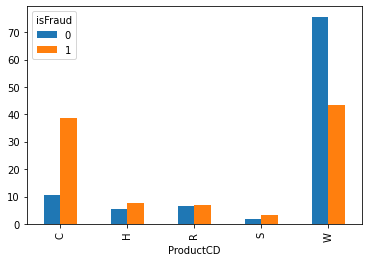

In [143]:
value_distribution_by_fraud_status('ProductCD')

### card1 - card6 (categorical)

In [333]:
from scipy import stats

In [334]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary



In [335]:
resumetable(train[['card1', 'card2', 'card3', 'card4', 'card5', 'card6']])

Dataset Shape: (590540, 6)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,card1,int64,0,13553,13926,2755,4663,9.97
1,card2,float64,8933,500,NaN,404,490,6.32
2,card3,float64,1565,114,150,150,150,0.68
3,card4,object,1577,4,discover,mastercard,visa,1.09
4,card5,float64,4259,119,142,102,166,2.66
5,card6,object,1571,4,credit,credit,debit,0.82


In [336]:
print("Card Features Quantiles: ")
print(train[['card1', 'card2', 'card3', 'card5']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))

Card Features Quantiles: 
         card1  card2  card3  card5
0.010   1338.0  100.0  144.0  102.0
0.025   1675.0  111.0  150.0  102.0
0.100   2803.0  111.0  150.0  126.0
0.250   6019.0  214.0  150.0  166.0
0.500   9678.0  361.0  150.0  226.0
0.750  14184.0  512.0  150.0  226.0
0.975  18018.0  583.0  185.0  226.0
0.990  18238.0  583.0  185.0  226.0


It may be a good idea to take the log of the card1 feature.

In [342]:
train.loc[train.card3.isin(train.card3.value_counts()[train.card3.value_counts() < 200].index), 'card3'] = "Others"
train.loc[train.card5.isin(train.card5.value_counts()[train.card5.value_counts() < 300].index), 'card5'] = "Others"

In [390]:
def plot_distribution(df, col):
    plt.figure(figsize=(14,5))

    plot = sns.distplot(train[train['isFraud'] == 1][col], label='Fraud')
    plot = sns.distplot(train[train['isFraud'] == 0][col], label='NoFraud')
    plot.legend()
    plot.set_title(f"{col} Values Distribution by Target", fontsize=20)
    plot.set_xlabel(f"{col} Values", fontsize=18)
    plot.set_ylabel("Probability", fontsize=18)

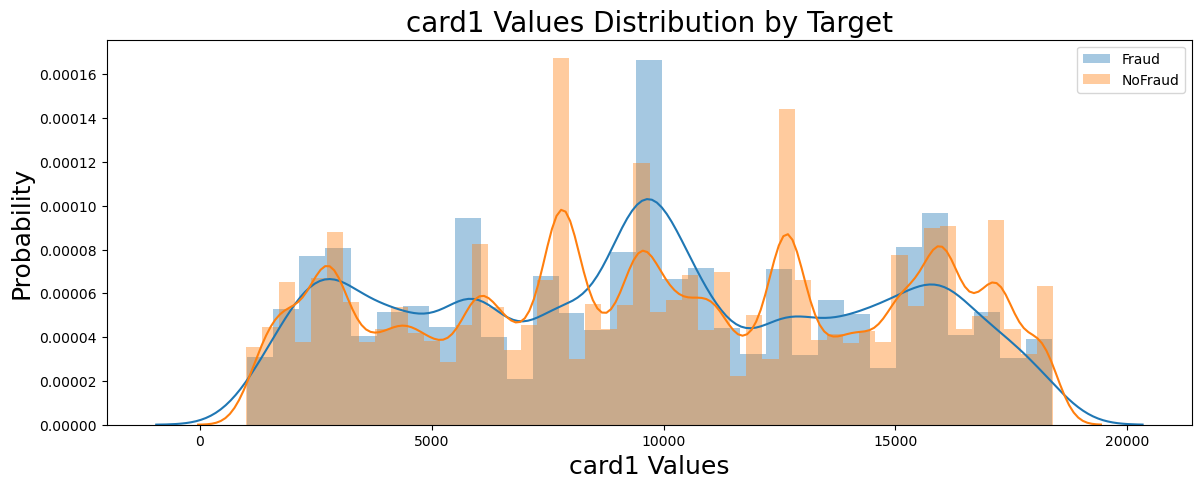

In [391]:
plot_distribution(train, 'card1')

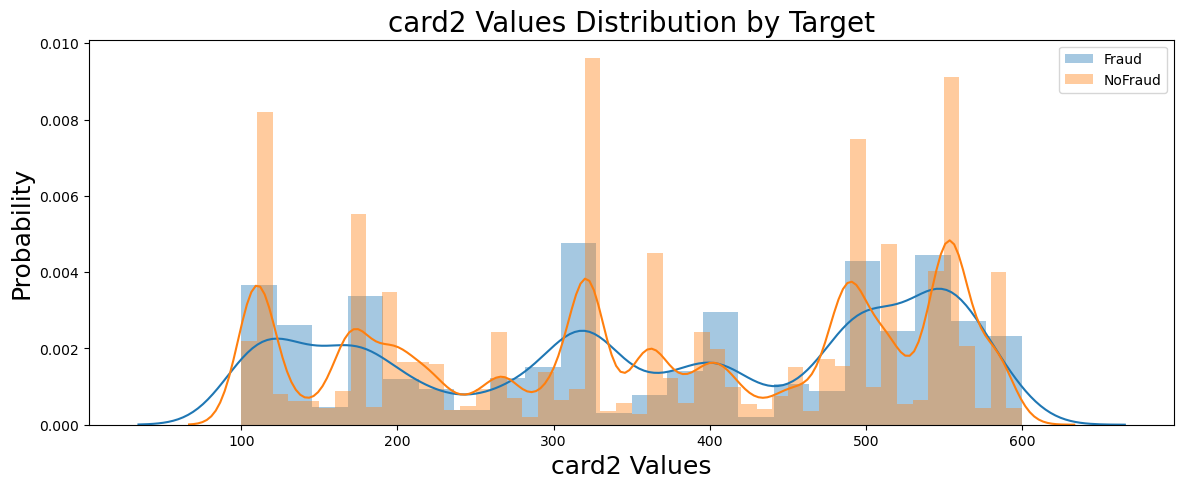

In [392]:
plot_distribution(train, 'card2')

In [376]:
def plot_counts(df, col):   
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    plt.figure(figsize=(16,6))    

    plot = sns.countplot(x=col, data=df, order=list(tmp[col].values))
    plot_t = plot.twinx()
    plot_t = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                           color='black', legend=False)
    plot_t.set_ylim(0,tmp['Fraud'].max()*1.1)
    plot_t.set_ylabel("%Fraud Transactions", fontsize=16)
    plot.set_title(f"Most Frequent {col} values and % Fraud Transactions", fontsize=20)
    plot.set_xlabel(f"{col} Category Names", fontsize=16)
    plot.set_ylabel("Count", fontsize=17)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
    sizes = []
    for p in plot.patches:
        height = p.get_height()
        sizes.append(height)
        plot.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    plot.set_ylim(0,max(sizes)*1.15)

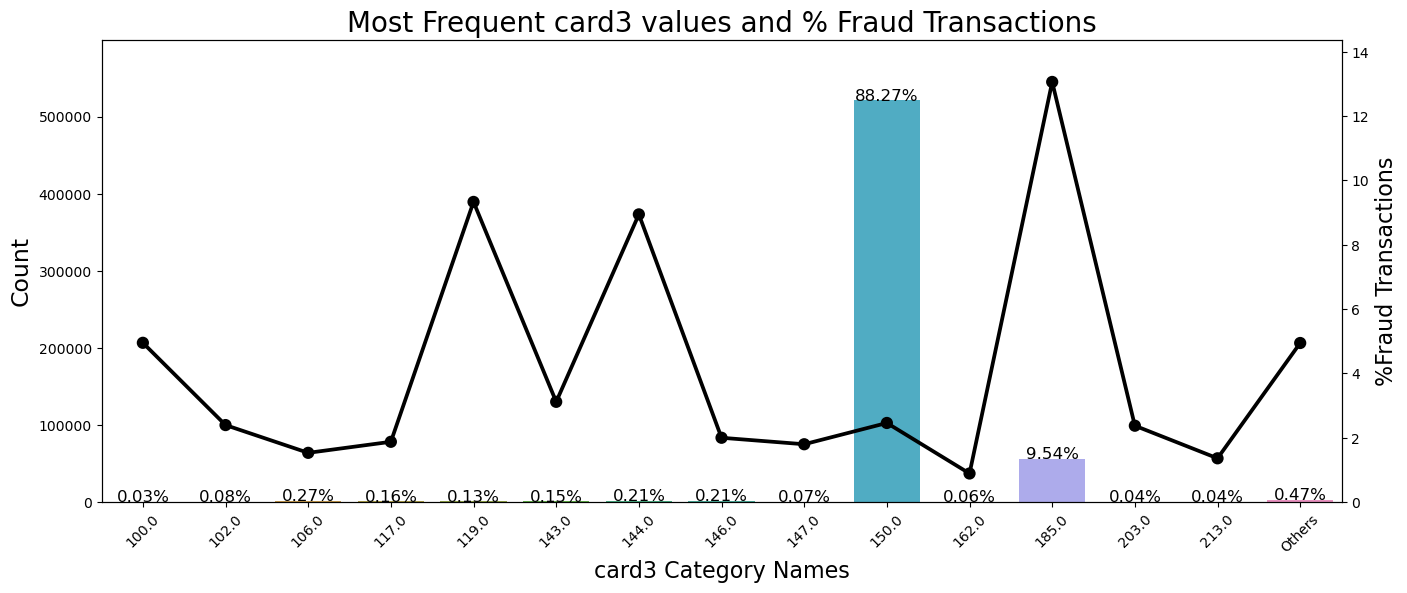

In [377]:
plot_counts(train, 'card3')

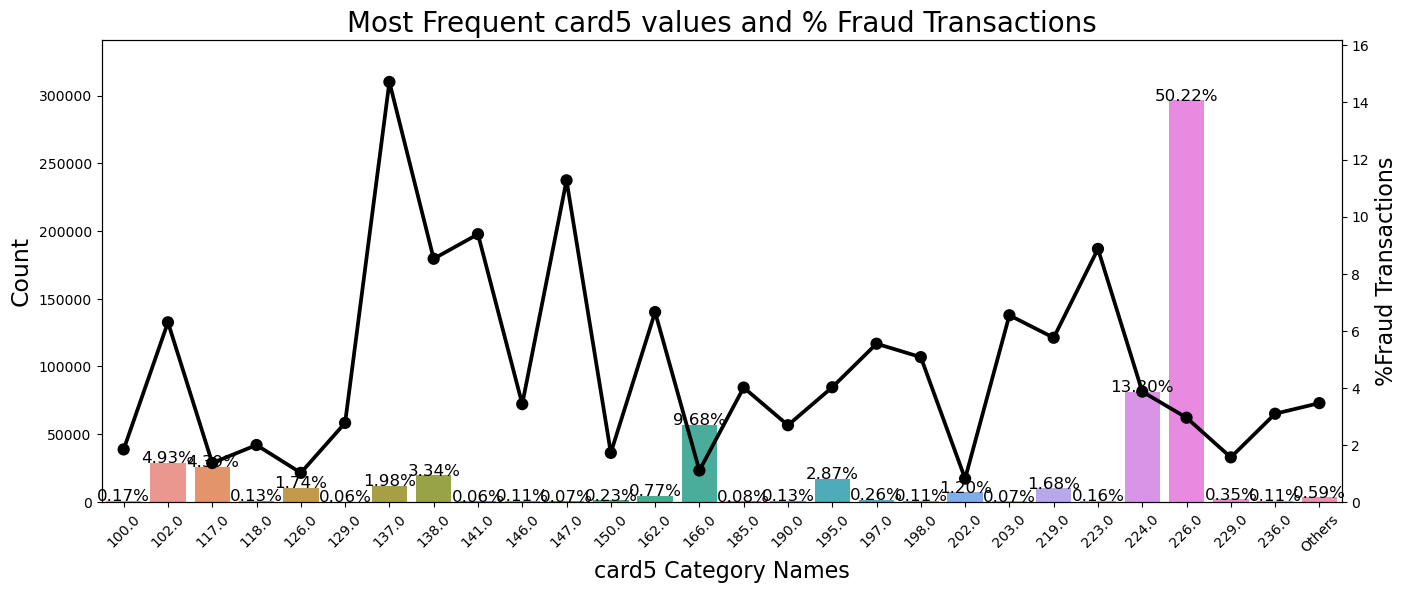

In [378]:
plot_counts(train, 'card5')

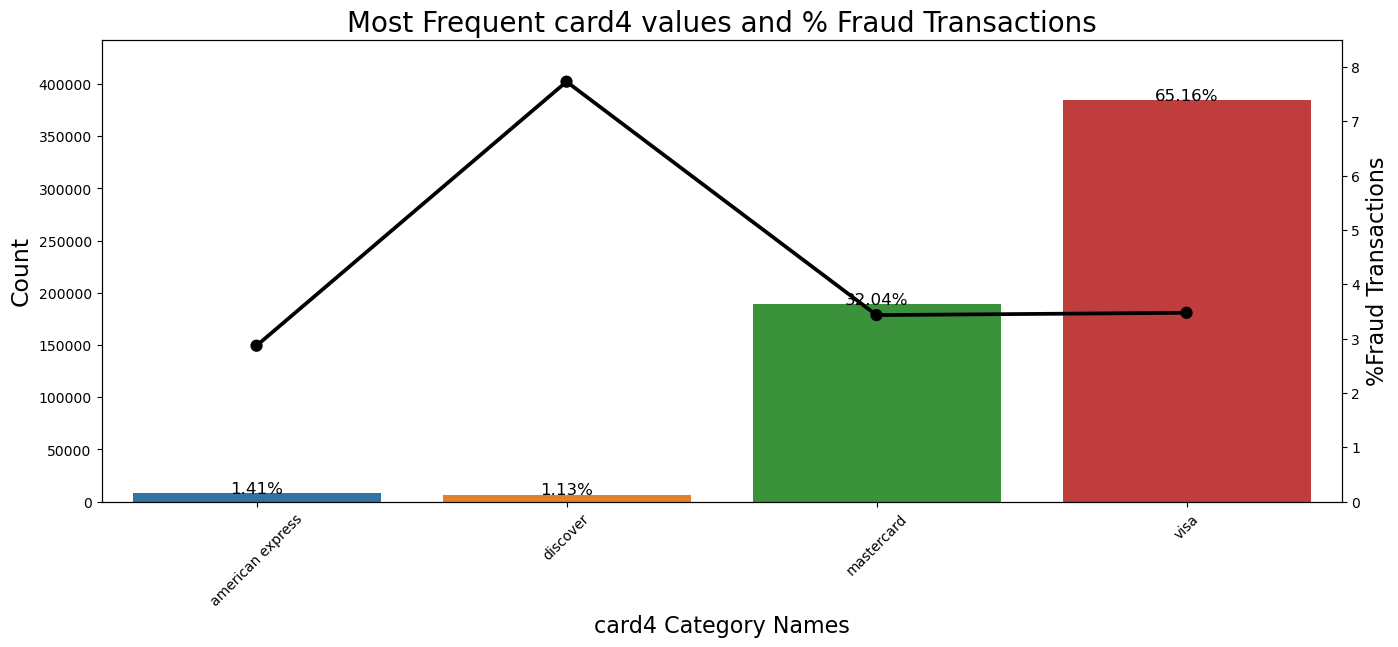

In [394]:
plot_counts(train, 'card4')

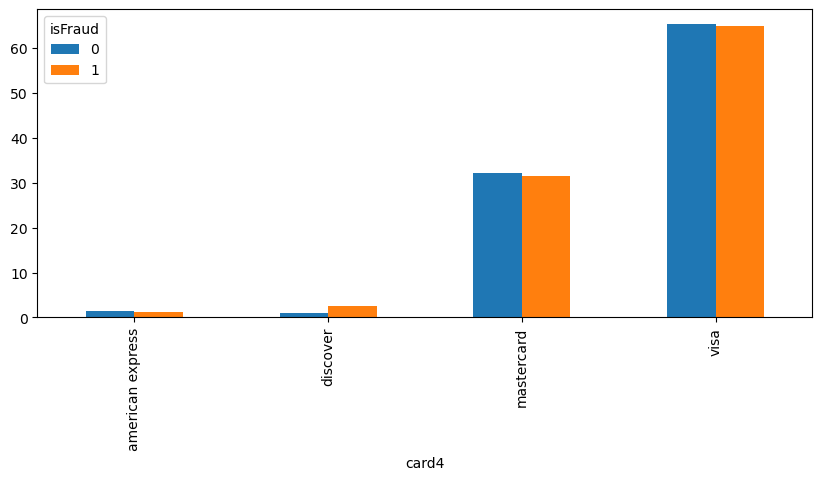

In [397]:
value_distribution_by_fraud_status('card4', figsize=(10, 4))

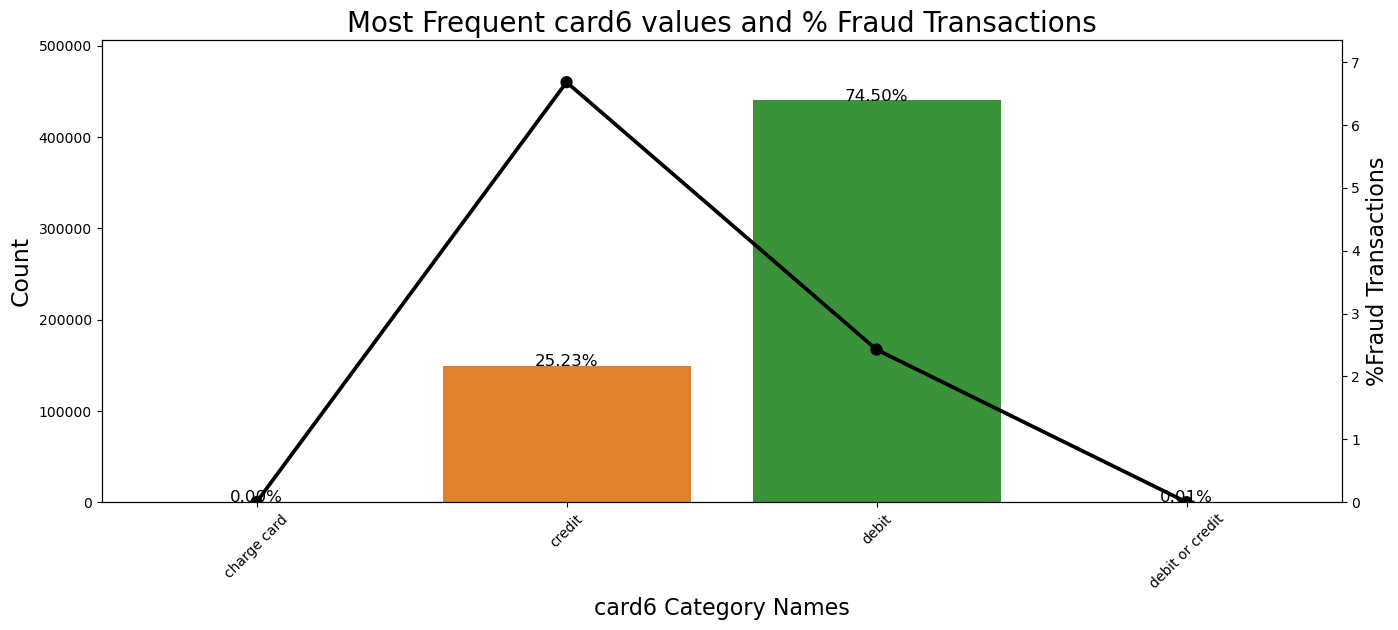

In [398]:
plot_counts(train, 'card6')

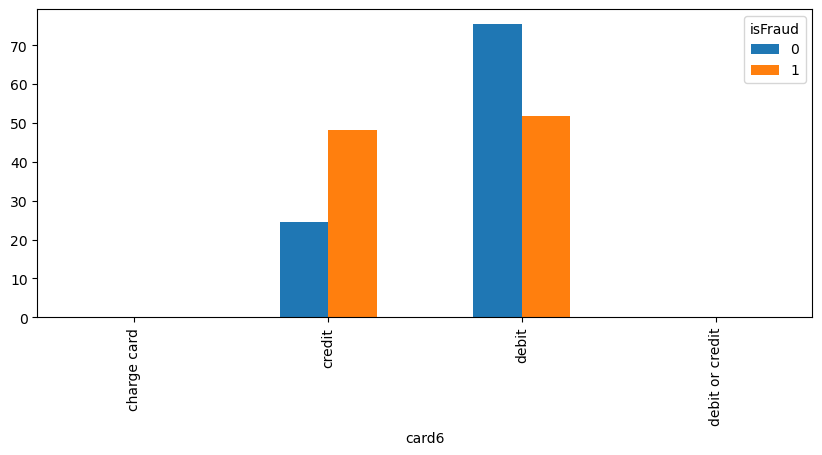

In [396]:
value_distribution_by_fraud_status('card6', figsize=(10, 4))

### TransactionDT, TransactionID, TransactionAmt (continuous)

In [443]:
resumetable(train[['TransactionDT', 'TransactionID', 'TransactionAmt']])

Dataset Shape: (590540, 3)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,TransactionDT,int64,0,573349,86400.0,86401.0,86469.0,19.11
1,TransactionID,int64,0,590540,2987000.0,2987001.0,2987002.0,19.17
2,TransactionAmt,float64,0,20902,68.5,29.0,59.0,8.35


In [132]:
START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
train['TransactionDT'] = train['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
test['TransactionDT'] = test['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

Text(0.5, 1.0, 'Distribution of transaction dates')

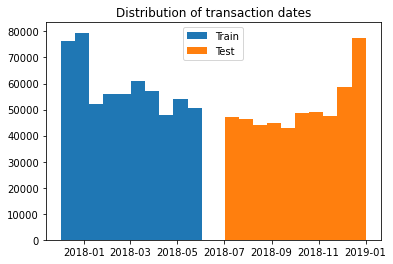

In [133]:
plt.hist(train['TransactionDT'], label='Train')
plt.hist(test['TransactionDT'], label='Test')
plt.legend()
plt.title('Distribution of transaction dates')

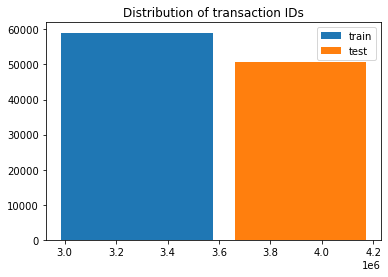

In [127]:
plt.hist(train['TransactionID'], label='train');
plt.hist(test['TransactionID'], label='test');
plt.legend();
plt.title('Distribution of transaction IDs');

In [214]:
print("Training, Transaction Amounts Quantiles:")
print(train['TransactionAmt'].quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]))
print("Test, Transaction Amounts Quantiles:")
print(test['TransactionAmt'].quantile([.01, .025, .1, .25, .5, .75, .9, .975, .99]))

Training, Transaction Amounts Quantiles:
0.010      9.2440
0.025     14.5010
0.100     25.9500
0.250     43.3210
0.500     68.7690
0.750    125.0000
0.900    275.2930
0.975    648.3345
0.990         inf
Name: TransactionAmt, dtype: float64
Test, Transaction Amounts Quantiles:
0.010       7.378
0.025      11.374
0.100      25.000
0.250      40.000
0.500      67.950
0.750     125.000
0.900     268.000
0.975     636.950
0.990    1104.000
Name: TransactionAmt, dtype: float64


In [399]:
train['TransactionAmt'] = np.log(train['TransactionAmt'])
test['TransactionAmt'] = np.log(test['TransactionAmt'])

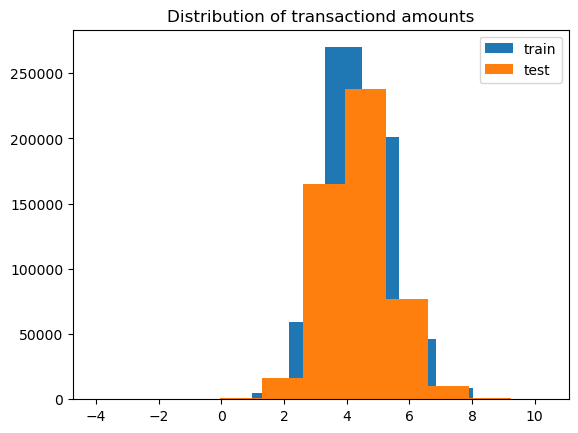

In [400]:
plt.hist(train['TransactionAmt'], label='train');
plt.hist(test['TransactionAmt'], label='test');
plt.legend();
plt.title('Distribution of transactiond amounts');

In [117]:
train.sort_values(by='isFraud', ascending=False).head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
374988,3361988,1,9345539,42.001,C,3901,176.0,185.0,mastercard,224.0,credit,NaN,NaN,NaN,NaN,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.0,2.0,0.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,0.0,63.259701,63.259701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.259701,63.259701,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,158728.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,33.0,NaN,New,NotFound,225.0,NaN,380.0,561.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome generic for android,NaN,NaN,NaN,F,F,T,F,mobile,Le X520 Build/IEXCNFN5902303111S
276475,32

In [118]:
train.sort_values(by='isFraud', ascending=False).tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
199455,3186455,0,4519758,23.553,C,3154,408.0,185.0,mastercard,224.0,debit,NaN,NaN,NaN,1.0,gmail.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,21.291666,0.291666,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.0,208746.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,225.0,NaN,266.0,325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 63.0,

### addr1, addr2 (categorical)

In [405]:
resumetable(train[['addr1', 'addr2']])

Dataset Shape: (590540, 2)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,addr1,float64,65706,332,315.0,325.0,330.0,5.06
1,addr2,float64,65706,74,87.0,87.0,87.0,0.08


In [407]:
print("addr Features Quantiles: ")
print(train[['addr1', 'addr2']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))

addr Features Quantiles: 
       addr1  addr2
0.010  123.0   87.0
0.025  123.0   87.0
0.100  177.0   87.0
0.250  204.0   87.0
0.500  299.0   87.0
0.750  330.0   87.0
0.975  498.0   87.0
0.990  512.0   87.0


In [438]:
def plot_cat_counts_and_percent_fraud(df, col):   
    total = len(train)
    total_amt = train.groupby(['isFraud'])['TransactionAmt'].sum().sum()
   
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    plt.figure(figsize=(16,14))    
    plt.suptitle( f'{col} Distributions ', fontsize=24)

    plt.subplot(211)
    plot = sns.countplot(x=col, data=df, order=list(tmp[col].values))
    plot_t = plot.twinx()
    plot_t = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                           color='black', legend=False)
    plot_t.set_ylim(0,tmp['Fraud'].max()*1.1)
    plot_t.set_ylabel("%Fraud Transactions", fontsize=16)
    plot.set_title(f"Most Frequent {col} values and % Fraud Transactions", fontsize=20)
    plot.set_xlabel(f"{col} Category Names", fontsize=16)
    plot.set_ylabel("Count", fontsize=17)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
    sizes = []
    for p in plot.patches:
        height = p.get_height()
        sizes.append(height)
        plot.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center",fontsize=12) 
        
    plot.set_ylim(0,max(sizes)*1.15)
    
    perc_amt = (df.groupby(['isFraud',col])['TransactionAmt'].sum() \
                / df.groupby([col])['TransactionAmt'].sum() * 100).unstack('isFraud')
    perc_amt = perc_amt.reset_index()
    perc_amt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    amt = df.groupby([col])['TransactionAmt'].sum().reset_index()
    perc_amt = perc_amt.fillna(0)
    
    plt.subplot(212)
    plot1 = sns.barplot(x=col, y='TransactionAmt', 
                       data=amt, 
                       order=list(tmp[col].values))
    plot1_t = plot1.twinx()
    plot1_t = sns.pointplot(x=col, y='Fraud', data=perc_amt, 
                        order=list(tmp[col].values),
                       color='black', legend=False, )
    plot1_t.set_ylim(0,perc_amt['Fraud'].max()*1.1)
    plot1_t.set_ylabel("%Fraud Total Amount", fontsize=16)
    plot1.set_xticklabels(plot1.get_xticklabels(),rotation=45)
    plot1.set_title(f"{col} by Transactions Total + %of total and %Fraud Transactions", fontsize=20)
    plot1.set_xlabel(f"{col} Category Names", fontsize=16)
    plot1.set_ylabel("Transaction Total Amount(U$)", fontsize=16)
    
    for p in plot1.patches:
        height = p.get_height()
        plot1.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total_amt*100),
                ha="center",fontsize=12) 
        
    plt.subplots_adjust(hspace=.4, top = 0.9)
    plt.show()
    

In [439]:
train.loc[train.addr1.isin(train.addr1.value_counts()[train.addr1.value_counts() <= 5000 ].index), 'addr1'] = "Others"
train.loc[train.addr2.isin(train.addr2.value_counts()[train.addr2.value_counts() <= 50 ].index), 'addr2'] = "Others"

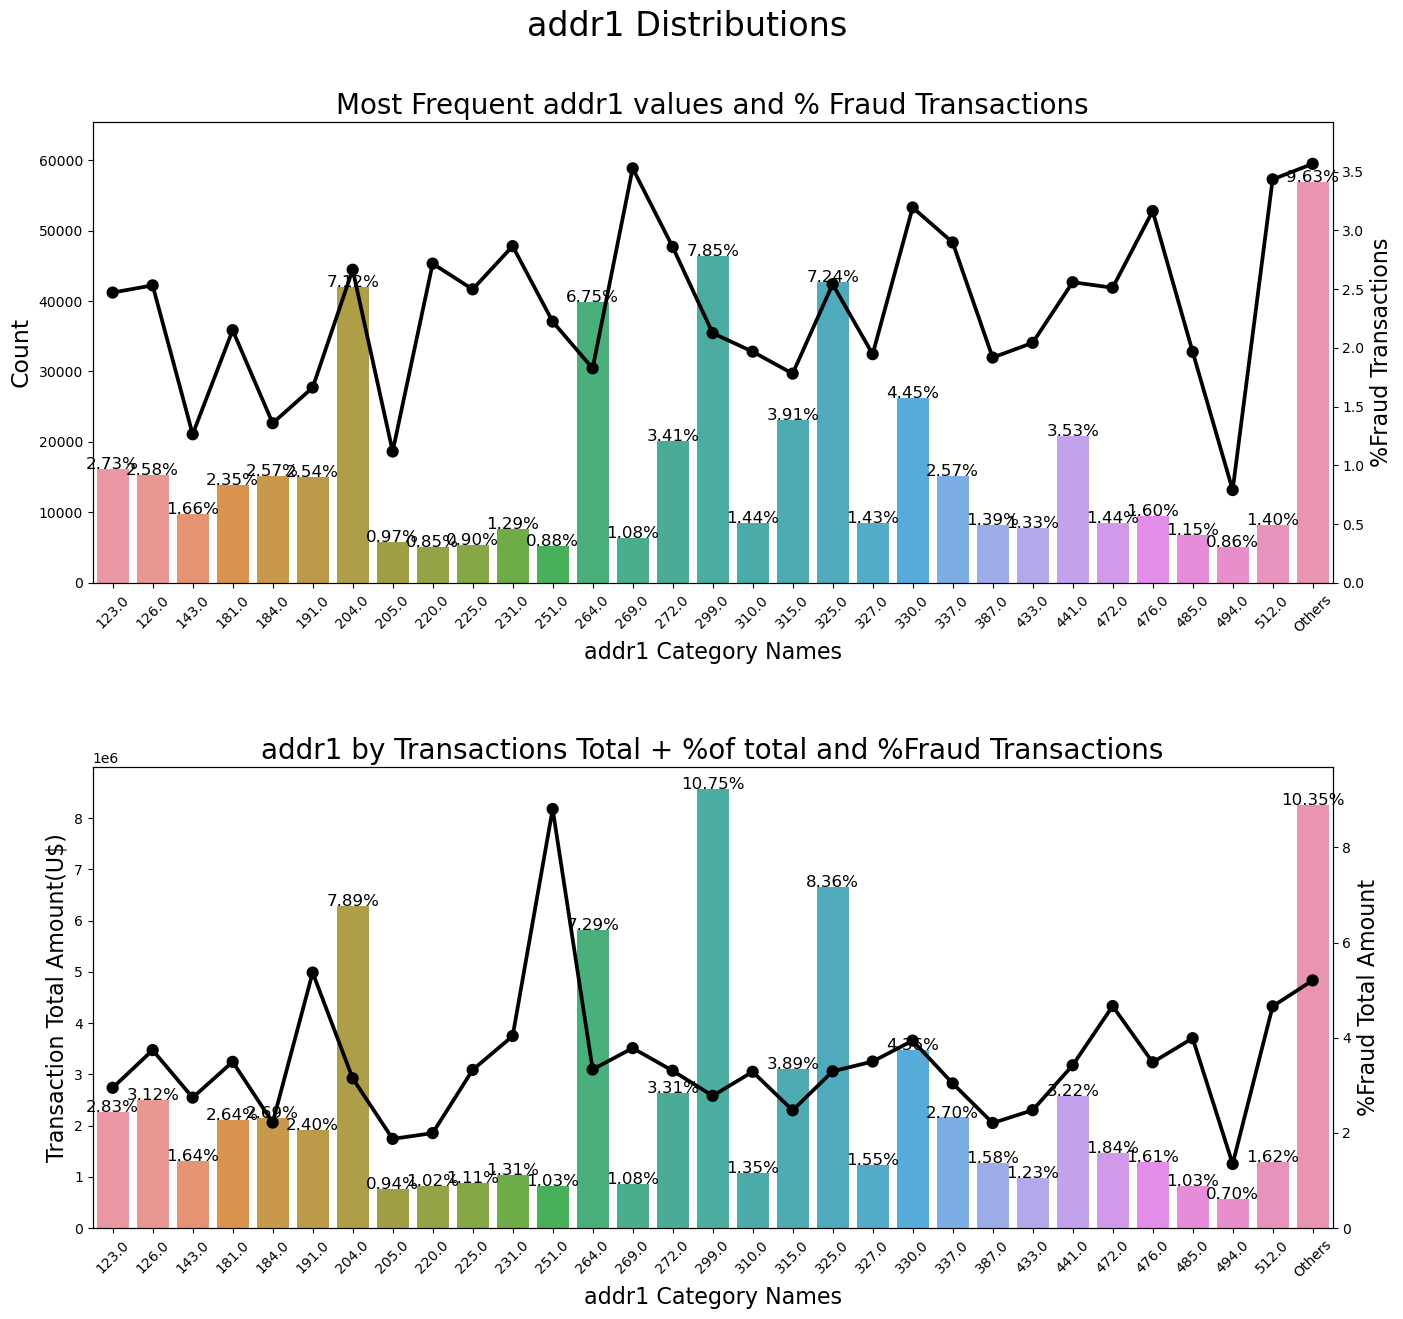

In [440]:
plot_cat_counts_and_percent_fraud(train, 'addr1')

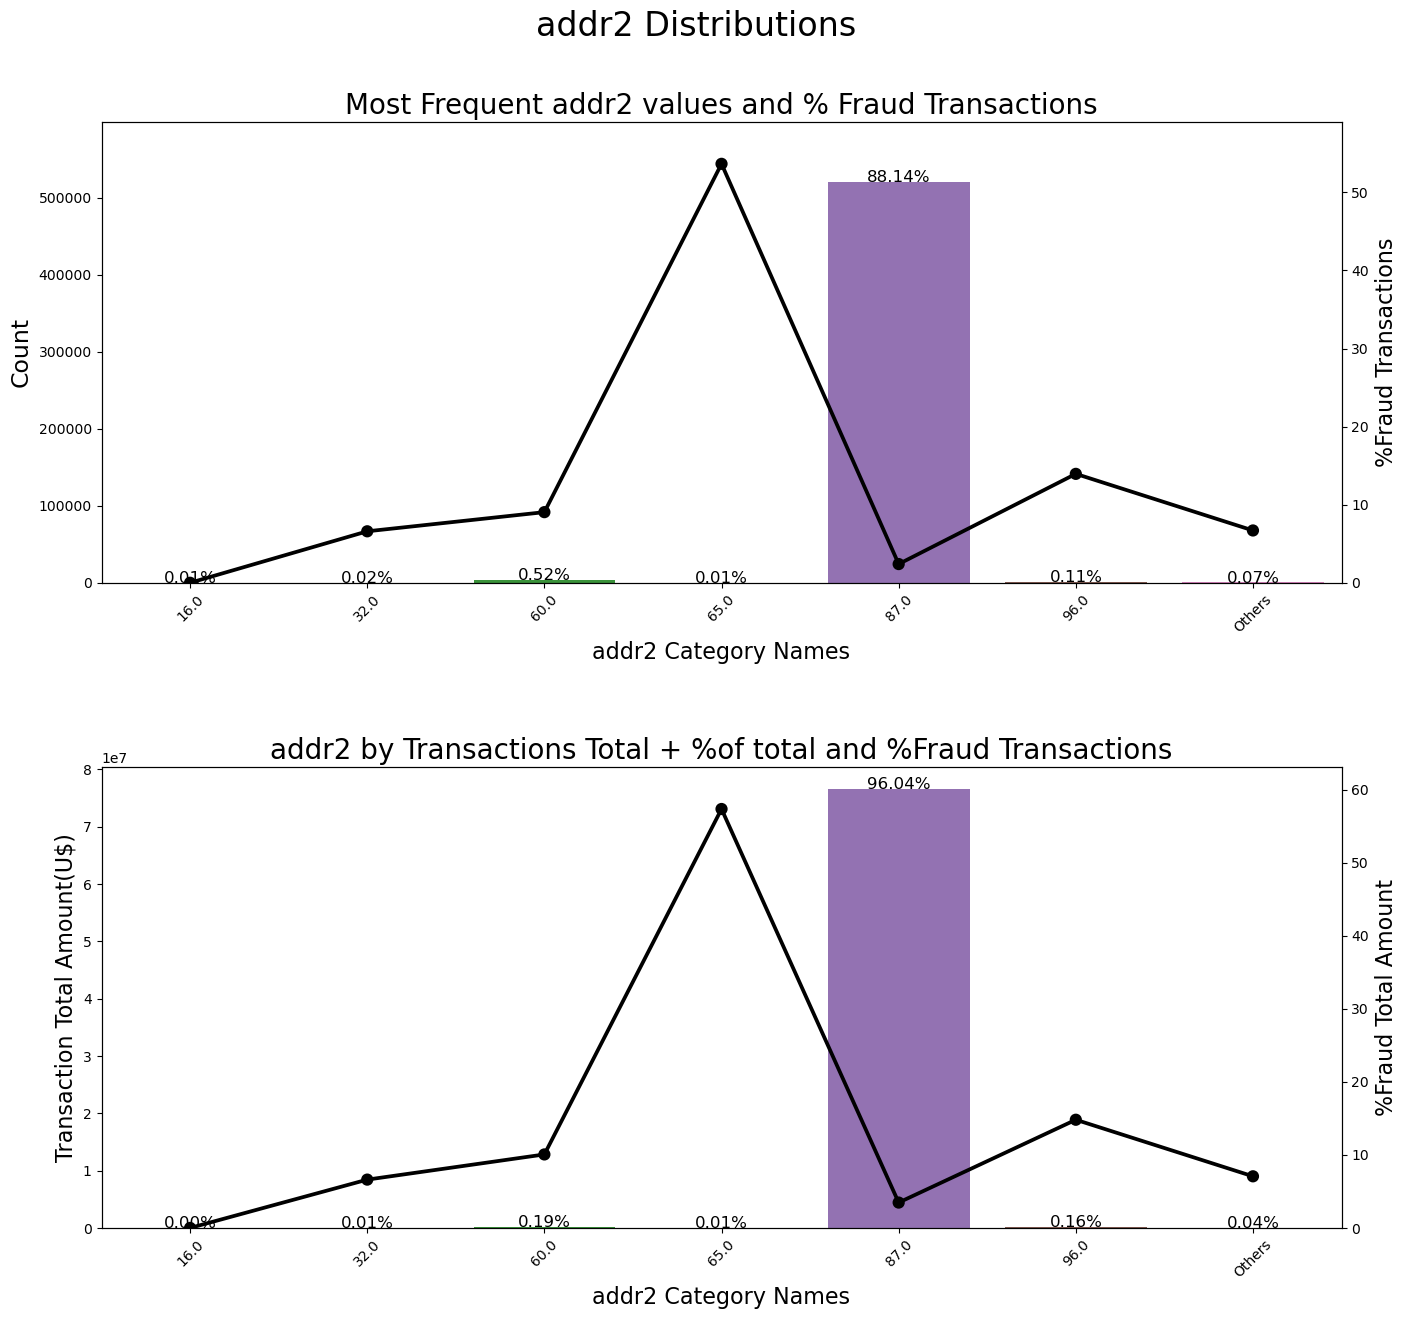

In [441]:
plot_cat_counts_and_percent_fraud(train, 'addr2')

### dist1, dist2 (continuous)

In [417]:
resumetable(train[['dist1', 'dist2']])

Dataset Shape: (590540, 2)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,dist1,float64,352271,2651,19.0,NaN,287.0,6.34
1,dist2,float64,552913,1751,NaN,NaN,NaN,7.42


In [418]:
print("dist Features Quantiles: ")
print(train[['dist1', 'dist2']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))

dist Features Quantiles: 
        dist1    dist2
0.010     0.0     0.00
0.025     0.0     0.00
0.100     1.0     1.00
0.250     3.0     7.00
0.500     8.0    37.00
0.750    24.0   206.00
0.975  1284.0  1839.00
0.990  2040.0  2367.48


In [421]:
train['dist1'] = np.log(train['dist1'] + 1)
train['dist2'] = np.log(train['dist2'] + 1)

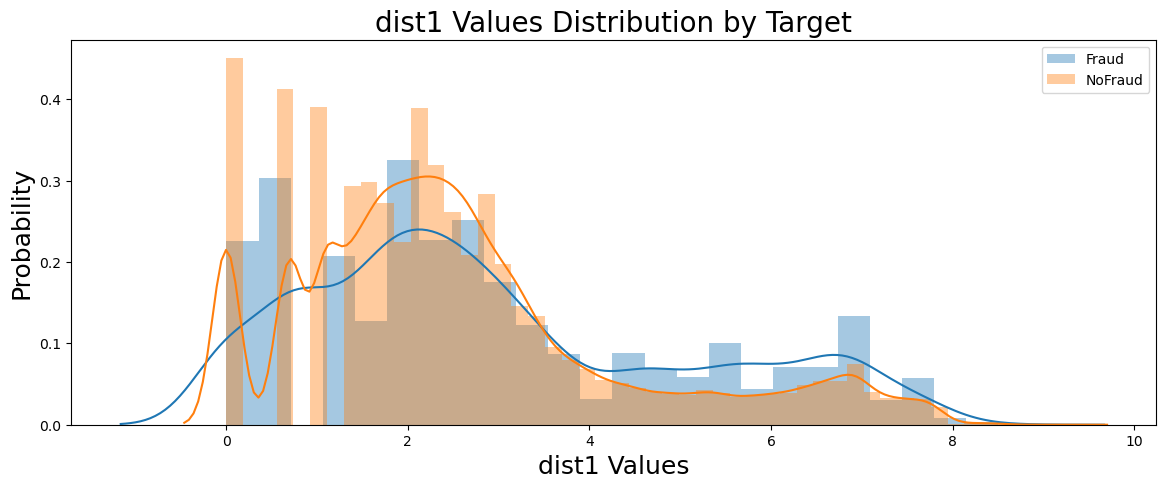

In [424]:
plot_distribution(train, 'dist1')

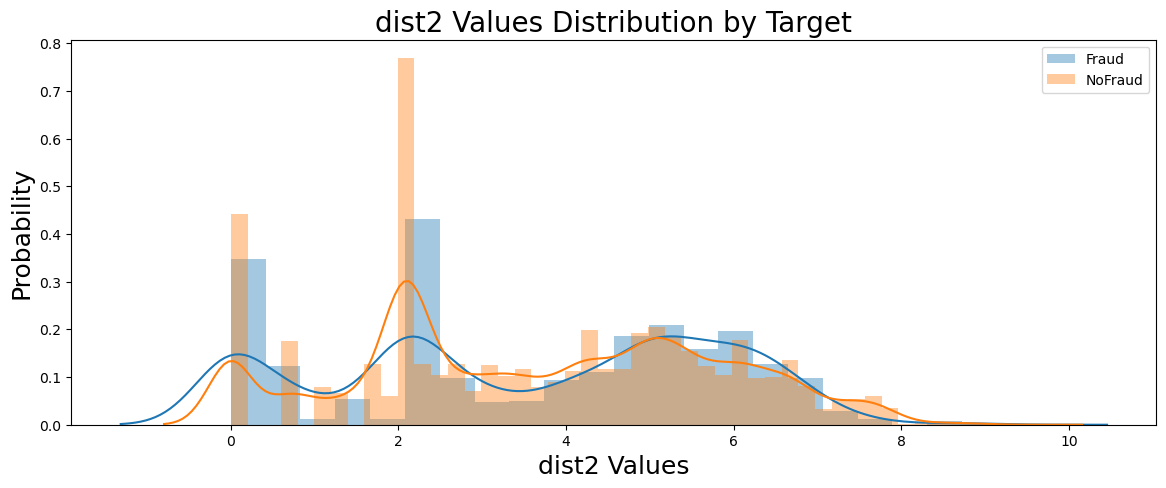

In [425]:
plot_distribution(train, 'dist2')

### P_emaildomain,  R_emaildomain (categorical)

In [427]:
resumetable(train[['P_emaildomain', 'R_emaildomain']])

Dataset Shape: (590540, 2)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,P_emaildomain,object,94456,59,NaN,gmail.com,outlook.com,2.68
1,R_emaildomain,object,453249,60,NaN,NaN,NaN,2.76


In [135]:
train.loc[train['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

train.loc[train['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'P_emaildomain'] = 'Yahoo Mail'
train.loc[train['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                             'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
train.loc[train.P_emaildomain.isin(train.P_emaildomain\
                                         .value_counts()[train.P_emaildomain.value_counts() <= 500 ]\
                                         .index), 'P_emaildomain'] = "Others"

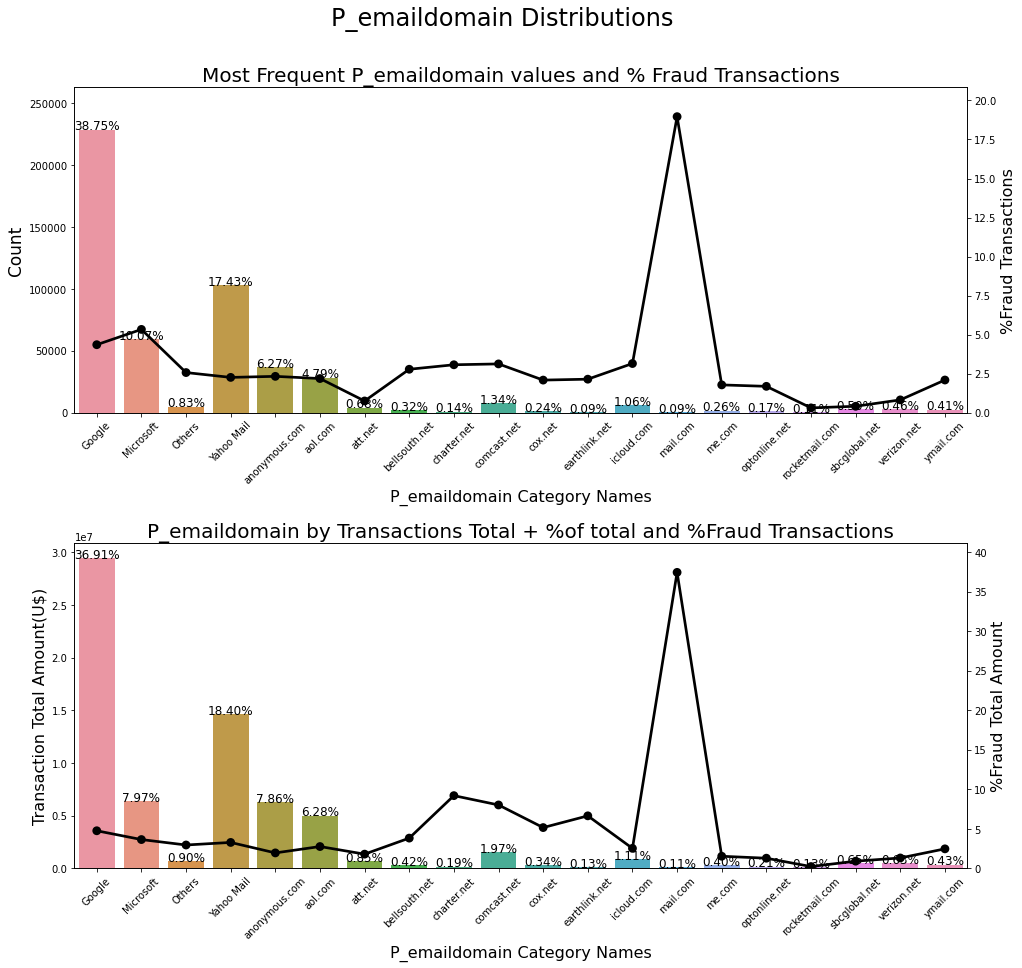

In [137]:
plot_cat_counts_and_percent_fraud(train, 'P_emaildomain')

In [138]:
train.loc[train['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

train.loc[train['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                             'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                             'yahoo.es']), 'R_emaildomain'] = 'Yahoo Mail'
train.loc[train['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                             'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                             'outlook.es', 'live.com', 'live.fr',
                                             'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'
train.loc[train.R_emaildomain.isin(train.R_emaildomain\
                                         .value_counts()[train.R_emaildomain.value_counts() <= 300 ]\
                                         .index), 'R_emaildomain'] = "Others"

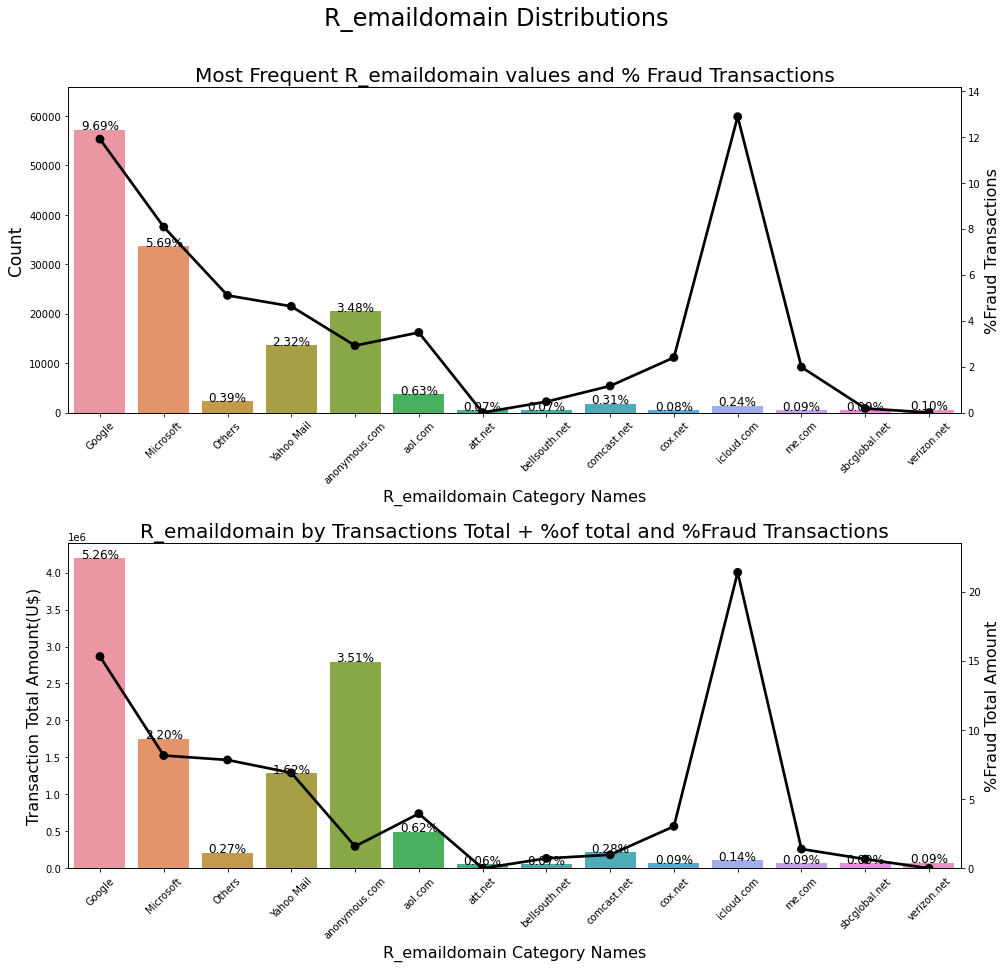

In [139]:
plot_cat_counts_and_percent_fraud(train, 'R_emaildomain')

### C1 - C14 (continuous)

In [429]:
resumetable(train[['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
                   'C9', 'C10', 'C11', 'C12', 'C13', 'C14']])

Dataset Shape: (590540, 14)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,C1,float64,0,1657,1.0,1.0,1.0,2.72
1,C2,float64,0,1216,1.0,1.0,1.0,2.75
2,C3,float64,0,27,0.0,0.0,0.0,0.04
3,C4,float64,0,1260,0.0,0.0,0.0,1.12
4,C5,float64,0,319,0.0,0.0,0.0,2.06
5,C6,float64,0,1328,1.0,1.0,1.0,2.52
6,C7,float64,0,1103,0.0,0.0,0.0,0.71
7,C8,float64,0,1253,0.0,0.0,0.0,1.25
8,C9,float64,0,205,1.0,0.0,1.0,2.62
9,C10,float64,0,1231,0.0,0.0,0.0,1.23


0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

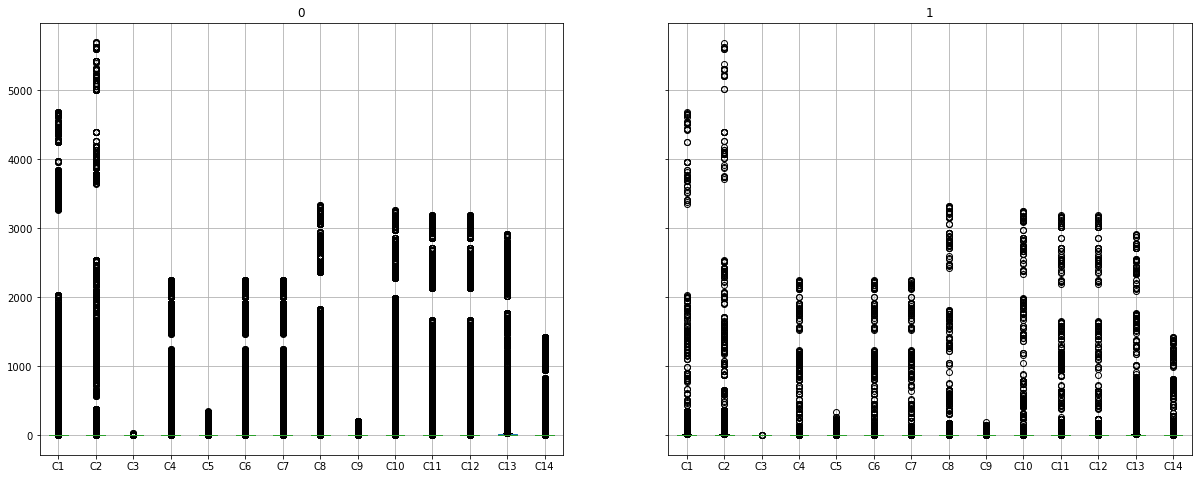

In [21]:
train.groupby(by='isFraud').boxplot(column=['C'+f'{i+1}' for i in range(14)], 
                                    figsize=(20,8))

<AxesSubplot:>

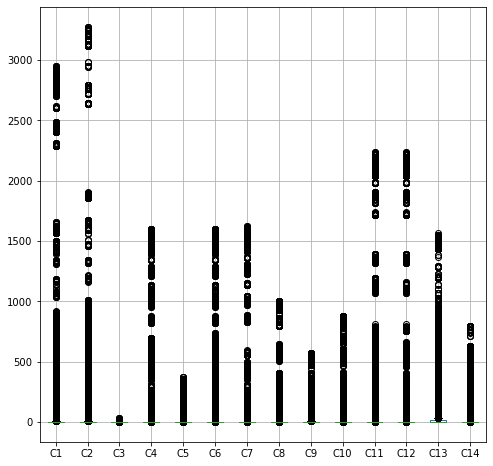

In [31]:
test.boxplot(column=['C'+f'{i+1}' for i in range(14)], figsize=(8,8))

0         AxesSubplot(0.1,0.15;0.363636x0.75)
1    AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

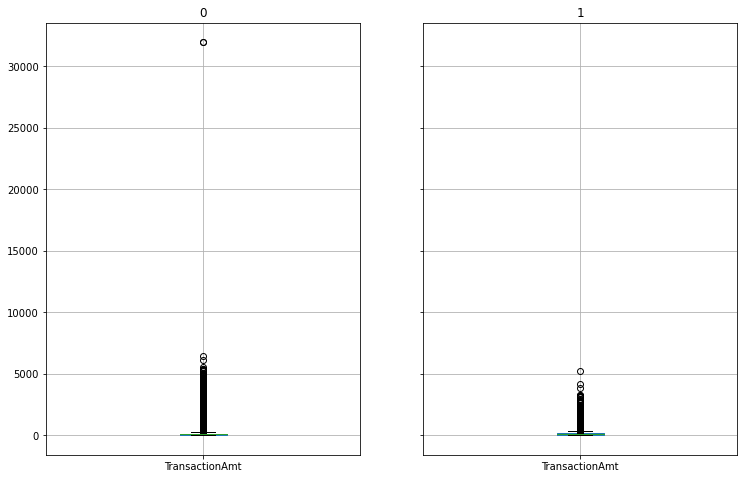

In [114]:
train.groupby(by='isFraud').boxplot(column=['TransactionAmt'], 
                                    figsize=(12,8))

### D1 - D15  (continuous)

In [430]:
resumetable(train[['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
                   'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15']])

Dataset Shape: (590540, 15)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,D1,float64,1269,641,14.0,0.0,0.0,5.57
1,D2,float64,280797,641,NaN,NaN,NaN,8.57
2,D3,float64,262878,649,13.0,NaN,NaN,5.60
3,D4,float64,168922,808,NaN,0.0,0.0,6.42
4,D5,float64,309841,688,NaN,NaN,NaN,5.95
5,D6,float64,517353,829,NaN,NaN,NaN,4.09
6,D7,float64,551623,597,NaN,NaN,NaN,4.29
7,D8,float64,515614,12353,NaN,NaN,NaN,11.32
8,D9,float64,515614,24,NaN,NaN,NaN,4.29
9,D10,float64,76022,818,13.0,0.0,0.0,6.09


### M1 - M9 (categorical)

In [433]:
resumetable(train[['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8',
                   'M9']])

Dataset Shape: (590540, 9)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,M1,object,271100,2,T,NaN,T,0.00
1,M2,object,271100,2,T,NaN,T,0.49
2,M3,object,271100,2,T,NaN,T,0.75
3,M4,object,281444,3,M2,M0,M0,1.31
4,M5,object,350482,2,F,T,F,0.99
5,M6,object,169360,2,T,T,F,1.00
6,M7,object,346265,2,NaN,NaN,F,0.57
7,M8,object,346252,2,NaN,NaN,F,0.95
8,M9,object,346252,2,NaN,NaN,F,0.63


### V1 - V339 (continuous)

In [436]:
resumetable(train[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12',
 'V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26',
 'V27','V28',
 'V29','V30','V31','V32','V33','V34','V35','V36','V37','V38','V39','V40','V41','V42',
 'V43','V44','V45','V46','V47','V48','V49','V50','V51','V52','V53','V54','V55','V56',
 'V57','V58','V59','V60','V61','V62','V63','V64','V65','V66','V67','V68','V69','V70',
 'V71','V72','V73','V74','V75','V76','V77','V78','V79','V80','V81','V82','V83','V84',
 'V85','V86','V87','V88','V89','V90','V91','V92','V93','V94','V95','V96','V97','V98',
 'V99','V100','V101','V102','V103','V104','V105','V106','V107','V108','V109','V110',
 'V111','V112','V113','V114','V115','V116','V117','V118','V119','V120','V121','V122',
 'V123','V124','V125','V126','V127','V128','V129','V130','V131','V132','V133','V134',
 'V135','V136','V137','V138','V139','V140','V141','V142','V143','V144','V145','V146',
 'V147','V148','V149','V150','V151','V152','V153','V154','V155','V156','V157','V158',
 'V159','V160','V161','V162','V163','V164','V165','V166','V167','V168','V169','V170',
 'V171','V172','V173','V174','V175','V176','V177','V178','V179','V180','V181','V182',
 'V183','V184','V185','V186','V187','V188','V189','V190','V191','V192','V193','V194',
 'V195','V196','V197','V198','V199','V200','V201','V202','V203','V204','V205','V206',
 'V207','V208','V209','V210','V211','V212','V213','V214','V215','V216','V217','V218',
 'V219','V220','V221','V222','V223','V224','V225','V226','V227','V228','V229','V230',
 'V231','V232','V233','V234','V235','V236','V237','V238','V239','V240','V241','V242',
 'V243','V244','V245','V246','V247','V248','V249','V250','V251','V252','V253','V254',
 'V255','V256','V257','V258','V259','V260','V261','V262','V263','V264','V265','V266',
 'V267','V268','V269','V270','V271','V272','V273','V274','V275','V276','V277','V278',
 'V279','V280','V281','V282','V283','V284','V285','V286','V287','V288','V289','V290',
 'V291','V292','V293','V294','V295','V296','V297','V298','V299','V300','V301','V302',
 'V303','V304','V305','V306','V307','V308','V309','V310','V311','V312','V313','V314','V315',
 'V316','V317','V318','V319','V320','V321','V322','V323','V324','V325','V326','V327',
 'V328','V329','V330','V331','V332','V333','V334', 'V335', 'V336', 'V337','V338','V339']])

Dataset Shape: (590540, 339)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,V1,float64,279287,2,1.0,NaN,1.0,0.00
1,V2,float64,279287,9,1.0,NaN,1.0,0.27
2,V3,float64,279287,10,1.0,NaN,1.0,0.40
3,V4,float64,279287,7,1.0,NaN,1.0,0.86
4,V5,float64,279287,7,1.0,NaN,1.0,0.95
5,V6,float64,279287,10,1.0,NaN,1.0,0.27
6,V7,float64,279287,10,1.0,NaN,1.0,0.38
7,V8,float64,279287,9,1.0,NaN,1.0,0.18
8,V9,float64,279287,9,1.0,NaN,1.0,0.25
9,V10,float64,279287,5,0.0,NaN,0.0,1.07


### id_1 - id_11 (continuous)

In [435]:
resumetable(train[['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
                   'id_09', 'id_10', 'id_11']])

Dataset Shape: (590540, 11)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id_01,float64,446307,77,NaN,NaN,NaN,2.27
1,id_02,float64,449668,115655,NaN,NaN,NaN,16.72
2,id_03,float64,524216,24,NaN,NaN,NaN,0.32
3,id_04,float64,524216,15,NaN,NaN,NaN,0.10
4,id_05,float64,453675,93,NaN,NaN,NaN,2.40
5,id_06,float64,453675,101,NaN,NaN,NaN,2.63
6,id_07,float64,585385,84,NaN,NaN,NaN,5.39
7,id_08,float64,585385,94,NaN,NaN,NaN,5.72
8,id_09,float64,515614,46,NaN,NaN,NaN,0.51
9,id_10,float64,515614,62,NaN,NaN,NaN,0.30


In [445]:
print("id_01 - id_11 Features Quantiles: ")
print(train[['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
                   'id_09', 'id_10', 'id_11']].quantile([0.01, .025, .1, .25, .5, .75, .975, .99]))

id_01 - id_11 Features Quantiles: 
       id_01      id_02  id_03  id_04  id_05  id_06  id_07  id_08  id_09  \
0.010  -95.0    1089.71    0.0    0.0   -9.0 -100.0 -14.46 -100.0    0.0   
0.025  -50.0    2465.00    0.0    0.0   -5.0  -51.0  -8.00 -100.0    0.0   
0.100  -20.0   30762.00    0.0    0.0    0.0  -24.0   0.00  -91.2    0.0   
0.250  -10.0   67992.00    0.0    0.0    0.0   -6.0   5.00  -48.0    0.0   
0.500   -5.0  125800.50    0.0    0.0    0.0    0.0  14.00  -34.0    0.0   
0.750   -5.0  228749.00    0.0    0.0    1.0    0.0  22.00  -23.0    0.0   
0.975    0.0  625050.95    1.0    0.0   18.0    0.0  35.00    0.0    2.0   
0.990    0.0  770898.32    3.0    0.0   25.0    0.0  39.00    0.0    3.0   

       id_10       id_11  
0.010  -10.0   94.190002  
0.025   -1.0   95.160004  
0.100    0.0  100.000000  
0.250    0.0  100.000000  
0.500    0.0  100.000000  
0.750    0.0  100.000000  
0.975    0.0  100.000000  
0.990    0.0  100.000000  


### id_12 - id_38 (categorical)

In [437]:
resumetable(train[['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 
                   'id_19','id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 
                   'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',
                   'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']]) 

Dataset Shape: (590540, 27)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id_12,object,446307,2,NaN,NaN,NaN,0.60
1,id_13,float64,463220,54,NaN,NaN,NaN,2.57
2,id_14,float64,510496,25,NaN,NaN,NaN,1.80
3,id_15,object,449555,3,NaN,NaN,NaN,1.33
4,id_16,object,461200,2,NaN,NaN,NaN,1.00
5,id_17,float64,451171,104,NaN,NaN,NaN,1.27
6,id_18,float64,545427,18,NaN,NaN,NaN,1.57
7,id_19,float64,451222,522,NaN,NaN,NaN,5.42
8,id_20,float64,451279,394,NaN,NaN,NaN,5.32
9,id_21,float64,585381,490,NaN,NaN,NaN,4.63


### Devicetype, DeviceInfo (categorical)

In [432]:
resumetable(train[['DeviceType', 'DeviceInfo']])

Dataset Shape: (590540, 2)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,DeviceType,object,449730,2,NaN,NaN,NaN,0.97
1,DeviceInfo,object,471874,1786,NaN,NaN,NaN,4.37


## Creating simplified data sets for  experimentation

### Random sampling of the test set

Now I will create take a sample of this dataset to work with during experimentation.

In [18]:
# randomly sample the date without replacement
train_s = train.sample(frac=0.1, axis=0)   

In [19]:
assert train_s.columns.shape[0]==train.columns.shape[0] 

In [20]:
train_s.to_csv(path/'train_s.csv')

### Simplfication of data set

In [21]:
# train_s = pd.read_csv(path/'train_s.csv', index_col=[0], low_memory=False)
# test = pd.read_csv(path/'test.csv', index_col=[0], low_memory=False)

In [23]:
train_s.shape, test.shape

((59054, 434), (506691, 433))

In [15]:
train_s.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

To simplify the dataset I will drop every collumn that records a Vxxx feature. There are over 339 such features many of which are highkly correllated.

In [16]:
train_ss = train_s.drop(list(train_s.filter(regex = 'V')), axis = 1)

In [17]:
assert len(train_ss.columns)==len(train_s.columns) - 339

In [18]:
train_ss.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain',
       'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8',
       'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4',
       'M5', 'M6', 'M7', 'M8', 'M9', 'id_01', 'id_02', 'id_03', 'id_04',
       'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')

In [19]:
train_ss.to_csv(path/'train_ss.csv')